In [1]:
import pandas as pd
import numpy as np

## Base de dados com opinioes sobre filmes e dados rotulados..

In [2]:
dados = pd.read_csv('data/imdb-reviews-pt-br.csv') # Retirado da base:https://www.kaggle.com/luisfredgs/imdb-ptbr

In [3]:
dados.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
dados.shape

(49459, 4)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
np.random.seed(42)

In [7]:
treino , teste , classe_treino, classe_teste = train_test_split(dados['text_pt'], dados.sentiment)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
regressao_logistica =LogisticRegression()

## É necessario ajustar os dados de testo para um modelo que a maquina consiga interpretar.. Nessa parte entra os modelos de NLP

#### Primeirámente devemos entender o tamanho dos nossos textos.. ( longos, curtos, etc..) e se possuim emoticons etc..

In [10]:
n=189
print(f'''Resenha clasificada como {dados.sentiment[n]}.

{dados.text_pt[n]}''')

Resenha clasificada como neg.

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [11]:
n=49002
print(f'''Resenha clasificada como {dados.sentiment[n]}.

{dados.text_pt[n]}''')

Resenha clasificada como pos.

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se torno

## Identificar a proporção de classificação ..

In [12]:
print(f''' Quantidade de dados:

{dados.sentiment.value_counts()}''')

 Quantidade de dados:

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [13]:
dados['classificacao']= dados.sentiment.replace(['neg','pos'],[0,1])
dados.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [14]:
dados.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


## .Representando os texto para a maquina - Vetorizando o texto (Bag of Words)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ('Assistir um filme ótimo', 'Assistir um filme ruim')

vetorizar = CountVectorizer(lowercase=False)

bag_of_words = vetorizar.fit_transform(texto)

In [16]:
vetorizar.get_feature_names() # Retorna o vocabulário

['Assistir', 'filme', 'ruim', 'um', 'ótimo']

In [17]:
print(bag_of_words)

  (0, 4)	1
  (0, 1)	1
  (0, 3)	1
  (0, 0)	1
  (1, 2)	1
  (1, 1)	1
  (1, 3)	1
  (1, 0)	1


In [18]:
import scipy.sparse  # Matriz sparse
matriz = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                    columns=vetorizar.get_feature_names())

In [19]:
matriz

,Assistir,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


## .Iniciando nossa análise

In [20]:


vetorizar = CountVectorizer(lowercase=False, max_features=50) # max_features --> otmisa a matriz para as primeiras 50 posições

bag_of_words = vetorizar.fit_transform(dados.text_pt)

print(bag_of_words.shape)

(49459, 50)


In [21]:
treino, teste , classe_treino, classe_teste = train_test_split(bag_of_words, dados.classificacao)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino,classe_treino)
acuracia = regressao_logistica.score(teste,classe_teste)

print('A curácia do algoritimo é de :',acuracia)

A curácia do algoritimo é de : 0.6515163768701981


#### Definindo função

In [22]:
def classificar_texto(texto, coluna_texto,coluna_classificacao):
    
    np.random.seed=42
    
    vetorizacao = CountVectorizer(lowercase=False,max_features=50)
    bag_of_words = vetorizacao.fit_transform(texto[coluna_texto])
    
    treino, teste , classe_treino, classe_teste = train_test_split(bag_of_words, texto[coluna_classificacao])

    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino,classe_treino)
    acuracia = regressao_logistica.score(teste,classe_teste)
    return acuracia

print(classificar_texto(dados,'text_pt','classificacao'))

0.6532147189648201


### . Word Cloud - Representação visual para ter insight de como deixar a o algoritimo mais preciso

In [23]:
#!pip install wordcloud

In [24]:
%matplotlib inline

from wordcloud import WordCloud

In [25]:
# Devemos juntar todas as palavras em uma unica variavel.

todas_palavras =' '.join([texto for texto in dados['text_pt']])

In [26]:
# cria a nuvem de palavras

nuvem_palavras = WordCloud(width=800, height=500,
                          max_font_size=110,
                           collocations = False
                          ).generate(todas_palavras)

In [27]:
import matplotlib.pyplot as plt

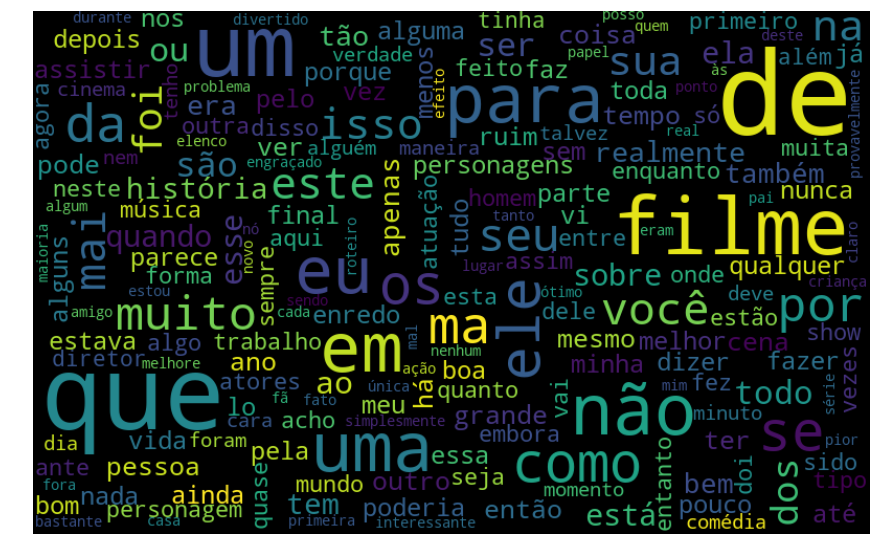

In [28]:
# plota a nuvem
plt.figure(figsize=(15,15))
plt.imshow(nuvem_palavras, interpolation='bilinear')# interpolation --> deixas a imagem mais nitida
plt.axis('off')
plt.show()

## Segregando em 2 nuvens - Uma para cada sentimento ( bom e ruim)

In [29]:
def nuvem_palavras_neg(texto,coluna_texto):
    
    texto_negativo = texto.query(" sentiment == 'neg' ")
    
    #junta as palavras
    todas_palavras =' '.join([texto for texto in texto_negativo[coluna_texto]])

    #cria a nuvem
    nuvem_palavras = WordCloud(width=800, height=500,
                              max_font_size=110,
                               collocations = False
                              ).generate(todas_palavras)

    # plota a nuvem
    plt.figure(figsize=(15,15))
    plt.imshow(nuvem_palavras, interpolation='bilinear')# interpolation --> deixas a imagem mais nitida
    plt.axis('off')
    plt.show()

In [30]:
def nuvem_palavras_pos(texto,coluna_texto):
    
    texto_positivo = texto.query(" sentiment == 'pos' ")
    
    #junta as palavras
    todas_palavras =' '.join([texto for texto in texto_positivo[coluna_texto]])

    #cria a nuvem
    nuvem_palavras = WordCloud(width=800, height=500,
                              max_font_size=110,
                               collocations = False
                              ).generate(todas_palavras)

    # plota a nuvem
    plt.figure(figsize=(15,15))
    plt.imshow(nuvem_palavras, interpolation='bilinear')# interpolation --> deixas a imagem mais nitida
    plt.axis('off')
    plt.show()

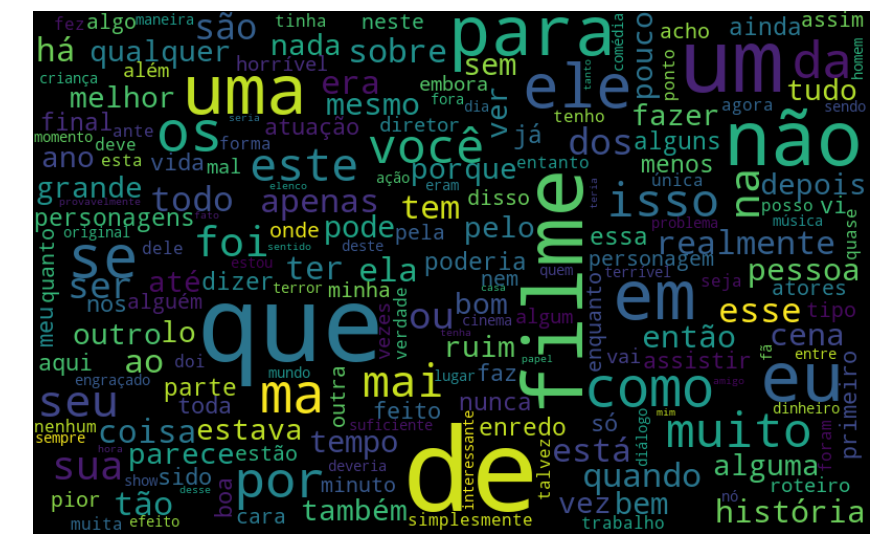

In [31]:
nuvem_palavras_neg(dados,'text_pt')

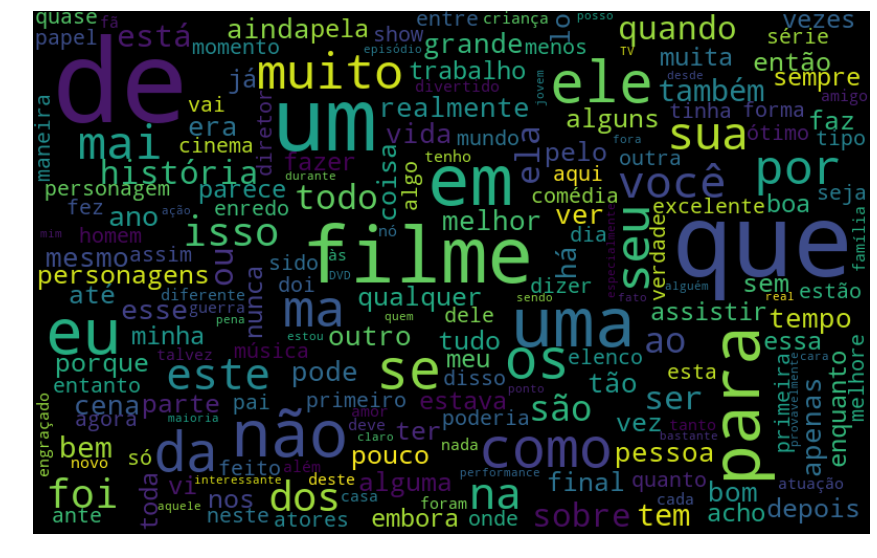

In [32]:
nuvem_palavras_pos(dados,'text_pt')

## Vamos fazer o processamento das palvras - NLP

In [33]:
import nltk

In [34]:
#nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Guilherme\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Guilherme\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\Guilherme\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\Guilherme\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\Guilherme\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]

[nltk_data]    |   Package ppattach is already up-to-date!
[nltk_data]    | Downloading package problem_reports to
[nltk_data]    |     C:\Users\Guilherme\AppData\Roaming\nltk_data...
[nltk_data]    |   Package problem_reports is already up-to-date!
[nltk_data]    | Downloading package propbank to
[nltk_data]    |     C:\Users\Guilherme\AppData\Roaming\nltk_data...
[nltk_data]    |   Package propbank is already up-to-date!
[nltk_data]    | Downloading package ptb to
[nltk_data]    |     C:\Users\Guilherme\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ptb is already up-to-date!
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     C:\Users\Guilherme\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_1 is already up-to-date!
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     C:\Users\Guilherme\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_2 is already up-to-date!
[nltk_data]    |

[nltk_data]    |   Package snowball_data is already up-to-date!
[nltk_data]    | Downloading package bllip_wsj_no_aux to
[nltk_data]    |     C:\Users\Guilherme\AppData\Roaming\nltk_data...
[nltk_data]    |   Package bllip_wsj_no_aux is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\Guilherme\AppData\Roaming\nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\Guilherme\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\Guilherme\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Guilherme\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_t

True

## Vamos calcula a frequencia das palavras para apresentarmos a 50 mais relenvantes 

In [35]:
frase = ['um filme ruim', 'um filme bom']
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

In [36]:
# Fazendo a tokenização ( lista de cada palavra)

from nltk import tokenize

In [37]:
frase = 'Bem vindo ao mundo do PLN!'

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


In [38]:
frase = 'Bem vindo ao mundo do PLN!'

token_espaco = nltk.tokenize.word_tokenize(frase)

print(token_espaco)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN', '!']


## Implementando a tokenização nos nossos dados

In [40]:
token_frase = token_espaco.tokenize(todas_palavras) # Tokeniza as palavras com o separador espaço
frequencia = nltk.FreqDist(token_frase)  # calcula a frenquencia das palavras

AttributeError: 'list' object has no attribute 'tokenize'

In [41]:
frequencia

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

In [42]:
# Criando um DataFrame com as frequencias

df = pd.DataFrame({'Palavra' : list(frequencia.keys()),
                  'Frequencia' : list(frequencia.values())})
df

,Palavra,Frequencia
0,um filme ruim,1
1,um filme bom,1


In [43]:
df.nlargest(columns = 'Frequencia', n = 10)

,Palavra,Frequencia
0,um filme ruim,1
1,um filme bom,1


## Removendo as palavras que não agregam semanticamente a nossa pergunta

In [44]:
import seaborn as sns

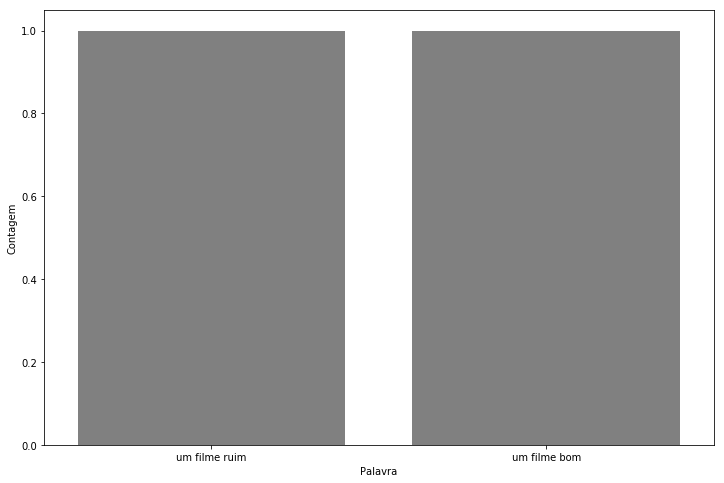

In [45]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df.nlargest(columns='Frequencia',n=10),x='Palavra',y='Frequencia',color='gray')
ax.set(ylabel='Contagem')
plt.show()

In [46]:
def pareto(texto,coluna_texto,quantidade):

    todas_palavras =' '.join([texto for texto in texto[coluna_texto]])

    token_frase =  nltk.tokenize.word_tokenize(todas_palavras) 
    frequencia = nltk.FreqDist(token_frase) 

    # Criando um DataFrame com as frequencias
    df = pd.DataFrame({'Palavra' : list(frequencia.keys()),
                      'Frequencia' : list(frequencia.values())})

    #plotar figura
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data=df.nlargest(columns='Frequencia',n=quantidade),x='Palavra',y='Frequencia',color='gray')
    ax.set(ylabel='Contagem')
    plt.show()


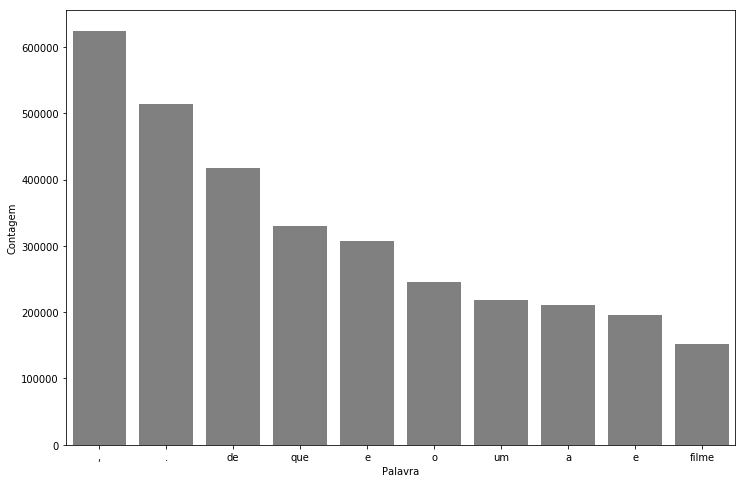

In [47]:
pareto(dados,'text_pt',10)

## Removendo as stop words

In [48]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese') # lista de palavras irrelevantes

In [49]:
print(palavras_irrelevantes)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [50]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
frase_processadas = []

for opiniao in dados.text_pt:
    nova_frase = []
    palavras_texto = nltk.tokenize.word_tokenize(opiniao.lower())
    
    for palavra in palavras_texto:
        if palavra.isalpha() == True:
            if palavra not in palavras_irrelevantes:
                nova_frase.append(palavra)
            
    frase_processadas.append(' '.join(nova_frase))
    
    
dados['tratamento_1'] = frase_processadas

In [51]:
dados.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,vez costner arrumou filme tempo necessário alé...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,exemplo motivo maioria filmes ação mesmos gené...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,beatles puderam escrever músicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,filmes fotos latão palavra apropriada verdade ...


In [52]:
classificar_texto(dados,'text_pt','classificacao')

0.6567731500202184

In [53]:
classificar_texto(dados,'tratamento_1','classificacao')

0.6926809543065103

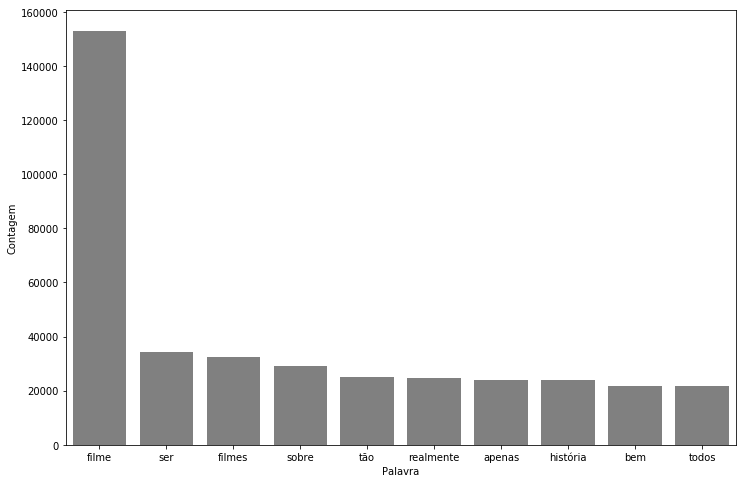

In [54]:
pareto(dados,'tratamento_1',10)

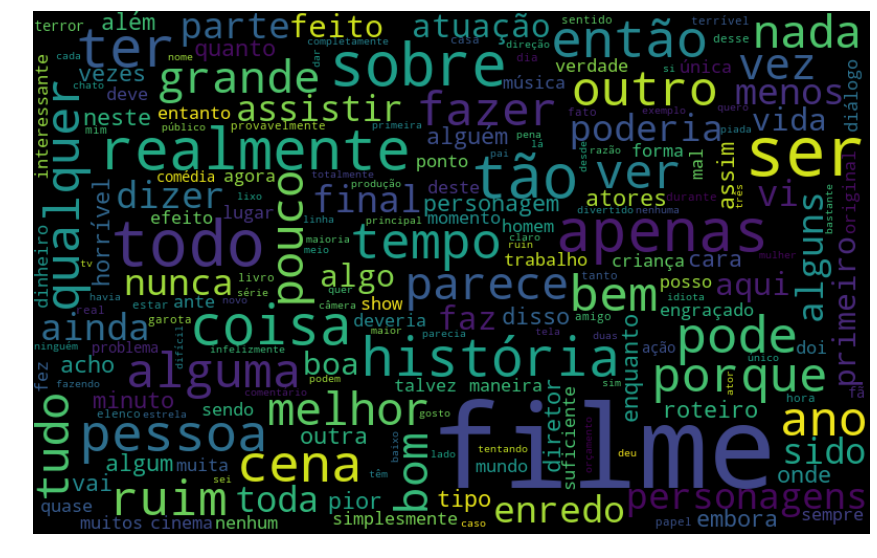

In [55]:
nuvem_palavras_neg(dados,'tratamento_1')

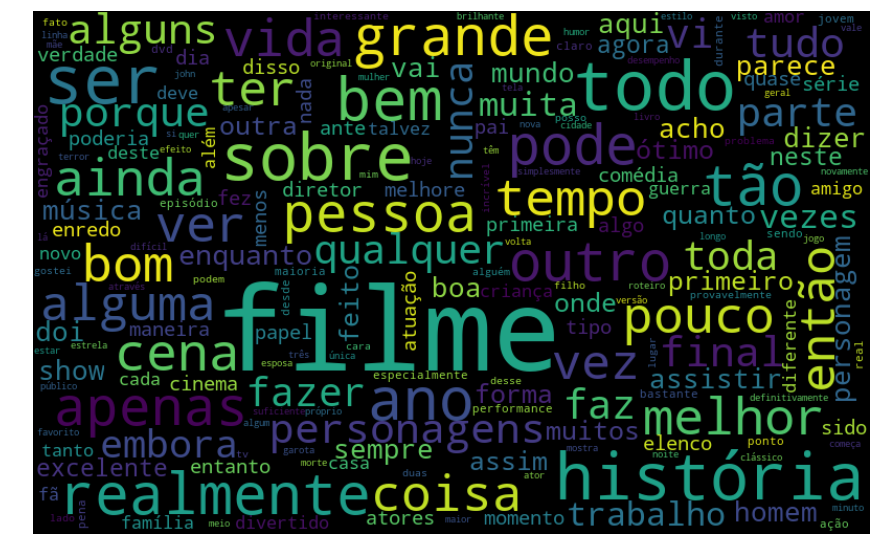

In [56]:
nuvem_palavras_pos(dados,'tratamento_1')

In [57]:
from string import punctuation

In [58]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
pontuacao =list()

for ponto in punctuation:
    pontuacao.append(ponto)

In [62]:
dados.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,vez costner arrumou filme tempo necessário alé...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,exemplo motivo maioria filmes ação mesmos gené...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,beatles puderam escrever músicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,filmes fotos latão palavra apropriada verdade ...


In [64]:
dados['text_pt'][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [65]:
dados['tratamento_1'][0]

'vez costner arrumou filme tempo necessário além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armário personagem costers realizado logo início esquecido tarde importava personagem deveríamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado único obstáculo parece estar vencendo costner finalmente bem além meio caminho costner conta sobre fantasmas kutchers informados kutcher levado ser melhor pressentimentos presságios anteriores nenhuma mágica aqui tudo podia fazer desligar hora'

In [66]:
stemmer = nltk.RSLPStemmer()
stemmer.stem('correria')

'corr'

In [67]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
frase_processadas = []

for opiniao in dados.text_pt:
    nova_frase = []
    palavras_texto = nltk.tokenize.word_tokenize(opiniao.lower())
    
    for palavra in palavras_texto:
        if palavra.isalpha() == True:
            if palavra not in palavras_irrelevantes:
                nova_frase.append(stemmer.stem(palavra))
            
    frase_processadas.append(' '.join(nova_frase))
    
    
dados['tratamento_4'] = frase_processadas

In [72]:
acuracia_tratamento_1 = classificar_texto(dados,'tratamento_1','classificacao')
acuracia_tratamento_4 = classificar_texto(dados,'tratamento_4','classificacao')

print(f'''Acuracia tratamento 1 : {round(acuracia_tratamento_1,4)}
Acuracia tratamento 4 : {round(acuracia_tratamento_4,4)}''')

Acuracia tratamento 1 : 0.6923
Acuracia tratamento 4 : 0.6904


In [73]:
dados.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_4
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,vez costner arrumou filme tempo necessário alé...,vez costn arrum film temp necess além terr seq...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,exemplo motivo maioria filmes ação mesmos gené...,exempl motiv maior film açã mesm genér chat na...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,primeiro tudo odeio raps imbecis poderiam agir...,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,beatles puderam escrever músicas todos gostass...,beatl pud escrev músic tod gost emb walt hill ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,filmes fotos latão palavra apropriada verdade ...,film fot lat palavr apropri verdad tant ous qu...


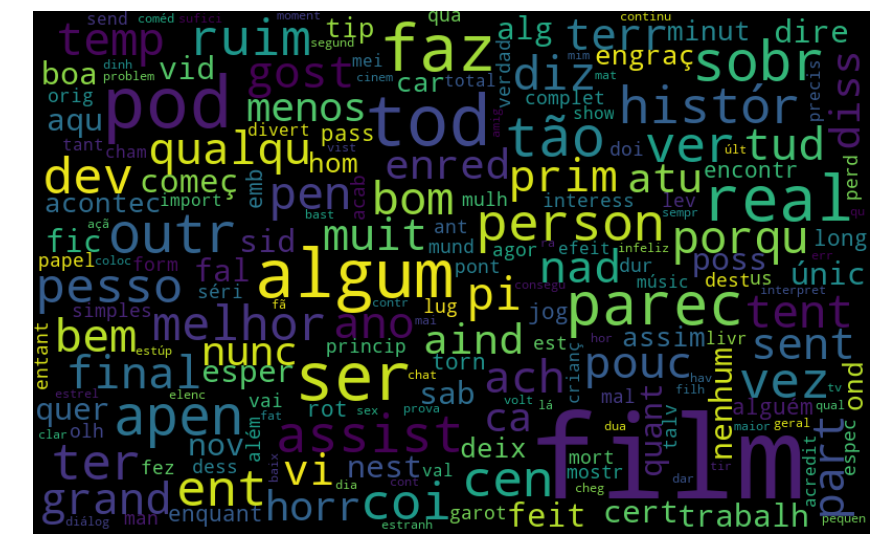

In [74]:
nuvem_palavras_neg(dados,'tratamento_4')

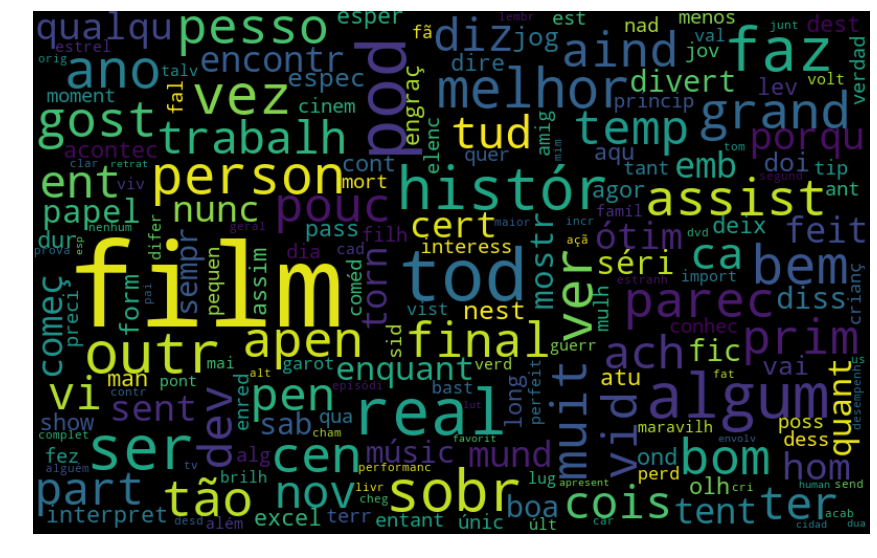

In [75]:
nuvem_palavras_pos(dados,'tratamento_4')

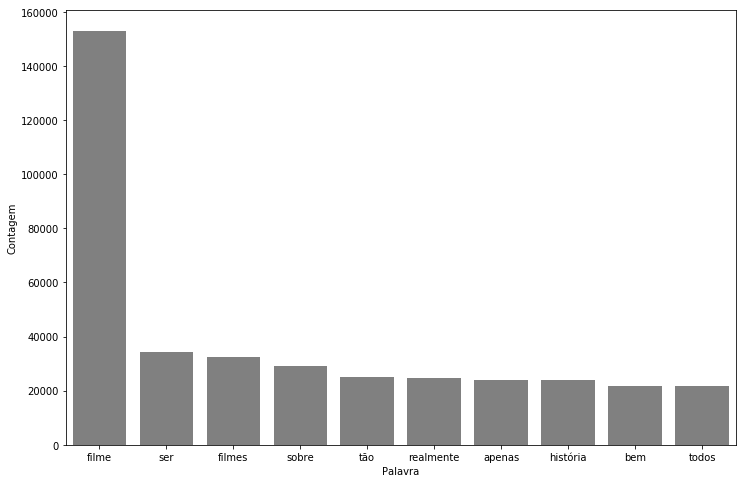

In [79]:
pareto(dados,'tratamento_1',10)

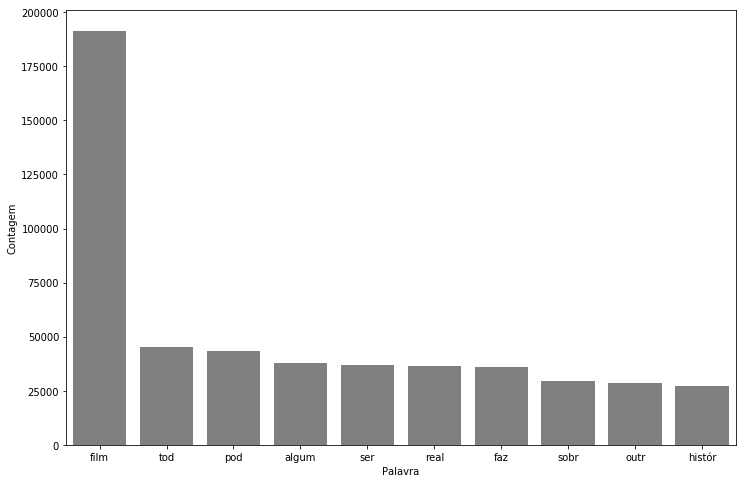

In [78]:
pareto(dados,'tratamento_4',10)

## Add peso para cada variavel..

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
frases = ['Assisti um filme ótimo', 'Assisti um filme péssimo']
tfidf = TfidfVectorizer(lowercase =False, max_features=50 )
caracteristicas = tfidf.fit_transform(frases)

pd.DataFrame(caracteristicas.todense(), columns=tfidf.get_feature_names()
)

,Assisti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [85]:
tfidf_bruto = tfidf.fit_transform(dados['text_pt'])
treino,teste,classe_treino,classe_teste = train_test_split(tfidf_bruto,
                                                           dados['classificacao'], random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste,classe_teste)
print(acuracia_tfidf_bruto)

0.6600889607763849


In [86]:
tfidf_bruto = tfidf.fit_transform(dados['tratamento_4'])
treino,teste,classe_treino,classe_teste = train_test_split(tfidf_bruto,
                                                           dados['classificacao'], random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste,classe_teste)
print(acuracia_tfidf_bruto)

0.696724625960372


## Criando ngrams

In [91]:
# as variaveis aumentam de tamanho
from nltk import ngrams
frase ='Assisti um ótimo filme.'

token_espaco = tokenize.WhitespaceTokenizer()
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada,2)
list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [93]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range= (1,2))# palavras isolada e palavras em bigramas
vetor_tfidf = tfidf.fit_transform(dados['tratamento_4'])
treino,teste,classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                            dados['classificacao'],
                                                           random_state=42)

In [94]:
regressao_logistica.fit(treino,classe_treino)
acurracia_tfitdf_ngram = regressao_logistica.score(teste, classe_teste)
print(acurracia_tfitdf_ngram)

0.8838657501010918


In [95]:
tfidf = TfidfVectorizer(lowercase=False, )
vetor_tfidf = tfidf.fit_transform(dados['tratamento_4'])
treino,teste,classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                            dados['classificacao'],
                                                           random_state=42)

regressao_logistica.fit(treino,classe_treino)
acurracia_tfitdf = regressao_logistica.score(teste, classe_teste)
print(acurracia_tfitdf)

0.8799838253133846


## Vamos observar as palavras com maior peso - segundo a regressão logistica

In [97]:
pesos = pd.DataFrame(regressao_logistica.coef_[0].T,
                      index = tfidf.get_feature_names()
)

pesos.nlargest(10,0) # Pesos para as melhores classificação

,0
ótim,8.199068
excel,7.920896
perfeit,6.583265
incr,6.203108
favorit,5.716600
maravilh,5.237847
ador,4.681743
divert,4.625640
brilh,4.321334
hoj,4.281669


In [99]:
pesos.nsmallest(10,0) # Pesos para as piores classificação

,0
pi,-9.237375
ruim,-9.186871
chat,-6.798896
horr,-6.421593
nad,-5.875956
infeliz,-5.181666
decepç,-5.093680
lix,-5.011702
nenhum,-4.993150
irrit,-4.893323


In [101]:
# 50 primeiras positivas 
pesos.nlargest(50,0)

,0
ótim,8.199068
excel,7.920896
perfeit,6.583265
incr,6.203108
favorit,5.716600
maravilh,5.237847
ador,4.681743
divert,4.625640
brilh,4.321334
hoj,4.281669
